# Aflevering 7

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Opgave a) Angiv hvordan belysningsniveauet $𝑦 = (𝑦_0, . . . , 𝑦_{599})$ og styrkerne $𝑥 = (𝑥_0, . . . , 𝑥_{11})$ er relateret via et lineært ligningssystem.

\begin{matrix}
\frac{x_0}{d^2_{0,0}} & + & \frac{x_1}{d^2_{1,0}} & + & \cdots & + & \frac{x_{i-1}}{d^2_{i-1,0}} & + & \frac{x_{i}}{d^2_{i,0}} = & y_0\\
\frac{x_0}{d^2_{0,1}} & + & \frac{x_1}{d^2_{1,1}} & + & \cdots & + & \frac{x_{i-1}}{d^2_{i-1,1}} & + & \frac{x_{i}}{d^2_{i,1}} = & y_1\\

&&&& \vdots\\
\frac{x_0}{d^2_{0,599}} & + & \frac{x_1}{d^2_{1,599}} & + & \cdots & + & \frac{x_{i-1}}{d^2_{i-1,599}} & + & \frac{x_{i}}{d^2_{i,599}} = & y_{599}\\
\end{matrix}

### Opgave b) Lav en heatplot der viser belysningsniveauet i hver kvadrat når alle lamper er tændt med styrke $𝑥_𝑖 = 20.0$

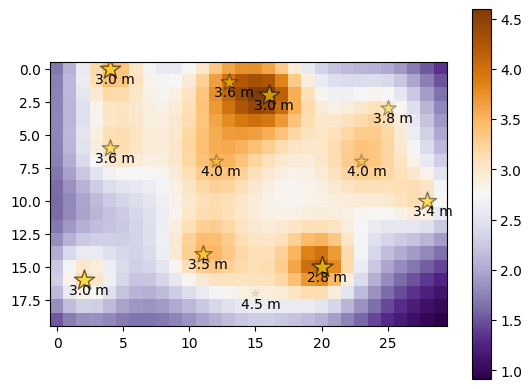

In [2]:
#Liste af lampeplaceringer

lamper = np.array([[4,19,3],[13,18,3.6],[16,17,3.0],[25,16,3.8],[4,13,3.6],[12,12,4.0],[23,12,4.0],[28,9,3.4],[2,3,3.0],[11,5,3.5],[15,2,4.5],[20,4,2.8]])

def feltstyrke_lys(lamper, i):
    lysstyrke=0
    
    #Konverter i til koordinater
    i_y=int(i/30)
    while i>=30:
        i = i-30
    i_x = i

    for element in lamper:
        lysstyrke += 20/(np.sqrt(np.abs(element[0]-i_x)**2 + np.abs(element[1]-i_y)**2 + np.abs(element[2])**2)**2)
    return lysstyrke
        

#Matrix with all the values
parkeringsplads = np.zeros((20,30))

for i in range(20):
    for j in range(30):
        parkeringsplads[i,j] = feltstyrke_lys(lamper, i*30+j)
        
#plot the matrix flipped on the y-axis looking like lamps
plt.imshow(parkeringsplads[::-1], cmap='PuOr_r')
plt.colorbar()

for element in lamper:
    plt.scatter(element[0], 19-element[1], c='gold', edgecolors='black', marker='*', alpha=1-(0.045*element[2]**2), s=400-(4.3*element[2])**2)

#Plot text with the lamp height above the lamps
for element in lamper:
    plt.text(element[0]-1.1, 19-element[1]+1.1, str(element[2])+' m', color='black', fontsize=10)


### Opgave c) Der ønskes at belysningsniveauet bliver så tæt så muligt på 1,0 i alle kvadrater. Brug den mindste kvadraters metode til at bestemme i python lysstyrken i hver lampe ved brug af (i) 𝑄𝑅-dekomponering via forbedret Gram-Schmidt, hhv. (ii) SVD-dekomponering.

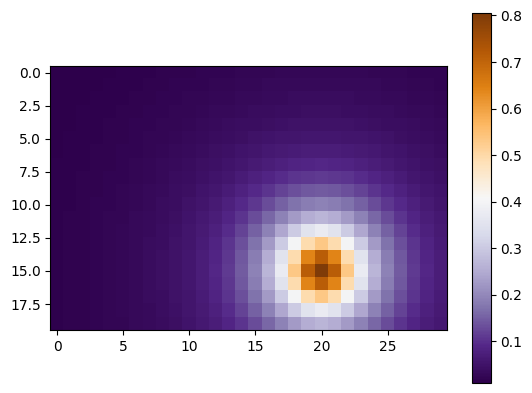

In [3]:
#Opgave c v2
#Ax=b
lamper = np.array([[4,19,3],[13,18,3.6],[16,17,3.0],[25,16,3.8],[4,13,3.6],[12,12,4.0],[23,12,4.0],[28,9,3.4],[2,3,3.0],[11,5,3.5],[15,2,4.5],[20,4,2.8]])

A_qr=np.zeros((600, 12))
b_qr=np.ones((600,1))
parkeringsplads_qr=np.zeros((20,30))

for i in range(600):
    for j in range(12):
        x, y, z = lamper[j]
        j_y=int(j/30)
        while j>=30:
            j = j-30
        j_x = j
        A_qr[i,j]=1/((np.sqrt((x-j_x)**2 + (y-j_y)**2 + z**2))**2)

# Find x
Q, R = np.linalg.qr(A_qr)
x_qr, residuals, rank, s = np.linalg.lstsq(R, np.dot(Q.T,b_qr), rcond=None)

for i in range(12):
    for j in range(600):

        j_y=int(j/30)
        while j>=30:
            j = j-30
        j_x = j

        parkeringsplads_qr[j_y,j_x] = x_qr[i]*1/((np.sqrt((lamper[i,0]-j_x)**2 + (lamper[i,1]-j_y)**2 + lamper[i,2]**2))**2)

plt.imshow(parkeringsplads_qr[::-1], cmap='PuOr_r')
plt.colorbar()

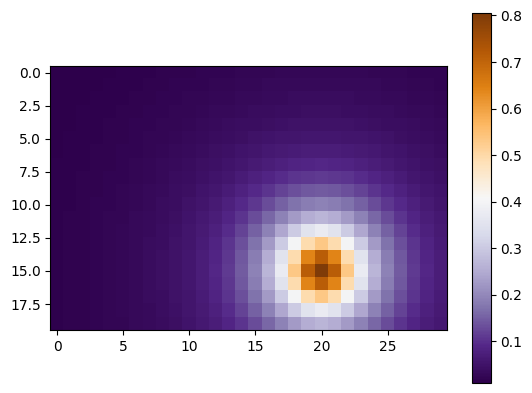

In [4]:
A_svd = np.zeros((600, 12))
b_svd = np.ones((600,1))
parkeringsplads_svd = np.zeros((20,30))

# Construct A
for i in range(600):
    for j in range(12):
        x, y, z = lamper[j]
        j_y=int(j/30)
        while j>=30:
            j = j-30
        j_x = j
        A_svd[i,j]=1/((np.sqrt((x-j_x)**2 + (y-j_y)**2 + z**2))**2)

# Solve Ax=b using SVD
U, S, Vt = np.linalg.svd(A_svd, full_matrices=False)

# Compute pseudoinverse of A
pinv_A_svd = Vt.T @ np.linalg.inv(np.diag(S)) @ U.T

# Solve Ax=b using lstsq
x_svd, residuals, rank, s = np.linalg.lstsq(A_svd, b_svd, rcond=None)



# Construct parkeringsplads
for i in range(12):
    for j in range(600):
        j_y=int(j/30)
        while j>=30:
            j = j-30
        j_x = j
        parkeringsplads_svd[j_y,j_x] = x_svd[i]*1/((np.sqrt((lamper[i,0]-j_x)**2 + (lamper[i,1]-j_y)**2 + lamper[i,2]**2))**2)

# Plot
plt.imshow(parkeringsplads_svd[::-1], cmap='PuOr_r')
plt.colorbar()


### d) Hvad er den maksimale afvigelse fra den ønskede værdi 1,0? Er der stor forskel mellem resultaterne fra de to metoder?

In [5]:
#Tjek for højeste afvigelse fra 1

max_svd = 0
max_qr = 0

min_svd = 0
min_qr = 0

for i in range(20):
    for j in range(30):
        if 1-parkeringsplads_svd[i,j] > max_svd:
            max_svd = parkeringsplads_svd[i,j]
        if 1-parkeringsplads_qr[i,j] > max_qr:
            max_qr = parkeringsplads_qr[i,j]
        if 1-parkeringsplads_svd[i,j] < min_svd:
            min_svd = parkeringsplads_svd[i,j]
        if 1-parkeringsplads_qr[i,j] < min_qr:
            min_qr = parkeringsplads_qr[i,j]

print('Max svd: ', max_svd)
print('Max qr: ', max_qr)
print('Min svd: ', min_svd)
print('Min qr: ', min_qr)

print("den største afvigelse fra 1 er: ", max(max_svd, max_qr, abs(min_svd), abs(min_qr))-1)

if (max(max_svd, max_qr, abs(min_svd), abs(min_qr))-1)==max_svd-1:
    print("Den største afvigelse er fra SVD")
elif (max(max_svd, max_qr, abs(min_svd), abs(min_qr))-1)==max_qr-1:
    print("Den største afvigelse er fra QR")

Max svd:  0.020096201491449927
Max qr:  0.020096201491449844
Min svd:  0
Min qr:  0
den største afvigelse fra 1 er:  -0.97990379850855
Den største afvigelse er fra SVD


Beregn tallene 𝜅(𝐴), cos 𝜃 og 𝜂, som styrer konditionstallene for problemet (sml. notesæt 17). Angiv den tilsvarende øvre grænse for konditions-
tallet for hvordan ændring i 𝐴 påvirker ændring i den beregnede 𝑥 i del (c).
Brug dette til at forklare hvor nøjagtig I kan forvente beregning af 𝑥 til at
være.

In [12]:
#beregning af eta
eta=(S[0]*np.linalg.norm(x_svd))/np.linalg.norm(b_svd)
print("Eta er:", eta)

#Beregning af cos(theta)
cos_theta=np.linalg.norm(U@U.T)/np.linalg.norm(b_svd)
print("Cos(theta) er:", cos_theta)

#Beregning af kondital
kappa = 1/cos_theta
print("Kondital er:", kappa)

Eta er: 1.0000000000000029
Cos(theta) er: 0.14142135623731836
Kondital er: 7.071067811865032
